# Experimentos con Múltiples Algoritmos

En este notebook se implementan tres algoritmos diferentes para el problema de predicción de tiempos de entrega:
1. Lasso Regression
2. Decision Tree Regressor 
3. K-means Clustering

Limpieza de datos requerida para que el algoritmo funcione

In [22]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import time
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Cargar datos
train_df = pd.read_csv('../Datos/Train_X.csv')
train_y = pd.read_csv('../Datos/Train_Y.csv').values.ravel()

validation_df = pd.read_csv('../Datos/Validation_1.csv')
validation_y = pd.read_csv('../Datos/Validation_2.csv').values.ravel()

test_df = pd.read_csv('../Datos/Test_1.csv')
test_y = pd.read_csv('../Datos/Test_2.csv').values.ravel()

# Preprocesamiento
def preprocess_data(df):
    # Identificar tipos de columnas
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Copiar el DataFrame para no modificar el original
    df_processed = df.copy()
    
    # 1. Manejar valores faltantes
    # Para columnas numéricas, usar la mediana
    for col in numeric_cols:
        df_processed[col] = df_processed[col].fillna(df_processed[col].median())
    
    # Para columnas categóricas, usar el modo
    for col in categorical_cols:
        df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])
    
    # 2. Procesar variables categóricas
    le = LabelEncoder()
    for col in categorical_cols:
        df_processed[col] = le.fit_transform(df_processed[col])
    
    return df_processed

# Aplicar preprocesamiento
train_x = preprocess_data(train_df)
validation_x = preprocess_data(validation_df)
test_x = preprocess_data(test_df)

# Escalar los datos
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
validation_x = scaler.transform(validation_x)
test_x = scaler.transform(test_x)

print("✅ Datos preprocesados correctamente")
print(f"Train shape: {train_x.shape}")
print(f"Validation shape: {validation_x.shape}")
print(f"Test shape: {test_x.shape}")

✅ Datos preprocesados correctamente
Train shape: (600, 8)
Validation shape: (200, 8)
Test shape: (200, 8)


Error que se medirá en el algoritmo lasso:
 MSE: este error calcula la diferencia entre un valor real y un valor estimado o predicho, mide que tan diferentes son los unos de los otro
 se usa en lasso porque dicho algoritmo minimiza el error cuadratico 


Variable dependiente: minutos que se demora la entrega.
Variables independientes: distancia.
factores controlables: Vehicle_Type,Preparation_Time_min, distance
factores no-controlables: weather, traffic_level

hiper-parametros: 
alpha: fuerza de la penalización [0.001, 0.01, 0.1]
max_iter: numero de iteraciones [1000, 5000, 10000]
tol:  tolerancia de parada [1e-3, 1e-4, 1e-5]


In [23]:
results = []
alpha_values = [0.001, 0.01, 0.1]
max_iter_values = [1000, 2000, 3000]  # Aseguramos que son enteros
tol_values = [1e-3, 1e-4, 1e-5]

# Convertir max_iter a enteros
max_iter_values = [int(x) for x in max_iter_values]

In [24]:
# Experimentación con diferentes hiperparámetros
results = []

for alpha in alpha_values:
    for max_iter in max_iter_values:
        for tol in tol_values:
            # Crear y entrenar el modelo
            model = Lasso(alpha=alpha, max_iter=max_iter, tol=tol, random_state=42)
            model.fit(train_x, train_y)
            
            # Predicciones
            train_pred = model.predict(train_x)
            validation_pred = model.predict(validation_x)
            
            # Calcular métricas
            train_mse = mean_squared_error(train_y, train_pred)
            val_mse = mean_squared_error(validation_y, validation_pred)
            train_r2 = r2_score(train_y, train_pred)
            val_r2 = r2_score(validation_y, validation_pred)
            
            # Guardar resultados
            results.append({
                'alpha': alpha,
                'max_iter': max_iter,
                'tol': tol,
                'Train_MSE': train_mse,
                'Val_MSE': val_mse,
                'Train_R2': train_r2,
                'Val_R2': val_r2
            })
            
            print(f"Completado: alpha={alpha}, max_iter={max_iter}, tol={tol}")

Completado: alpha=0.001, max_iter=1000, tol=0.001
Completado: alpha=0.001, max_iter=1000, tol=0.0001
Completado: alpha=0.001, max_iter=1000, tol=1e-05
Completado: alpha=0.001, max_iter=2000, tol=0.001
Completado: alpha=0.001, max_iter=2000, tol=0.0001
Completado: alpha=0.001, max_iter=2000, tol=1e-05
Completado: alpha=0.001, max_iter=3000, tol=0.001
Completado: alpha=0.001, max_iter=3000, tol=0.0001
Completado: alpha=0.001, max_iter=3000, tol=1e-05
Completado: alpha=0.01, max_iter=1000, tol=0.001
Completado: alpha=0.01, max_iter=1000, tol=0.0001
Completado: alpha=0.01, max_iter=1000, tol=1e-05
Completado: alpha=0.01, max_iter=2000, tol=0.001
Completado: alpha=0.01, max_iter=2000, tol=0.0001
Completado: alpha=0.01, max_iter=2000, tol=1e-05
Completado: alpha=0.01, max_iter=3000, tol=0.001
Completado: alpha=0.01, max_iter=3000, tol=0.0001
Completado: alpha=0.01, max_iter=3000, tol=1e-05
Completado: alpha=0.1, max_iter=1000, tol=0.001
Completado: alpha=0.1, max_iter=1000, tol=0.0001
Comple

In [25]:
# Crear DataFrame con resultados y ordenar por MSE de validación
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values('Val_MSE')

# Mostrar los mejores 10 modelos
print("Top 10 mejores modelos según MSE en validación:")
display(results_df_sorted.head(10))

# Obtener el mejor modelo
mejor_modelo = results_df_sorted.iloc[0]
print("\nMejor configuración encontrada:")
for param, value in mejor_modelo.items():
    print(f"{param}: {value}")

Top 10 mejores modelos según MSE en validación:


,alpha,max_iter,tol,Train_MSE,Val_MSE,Train_R2,Val_R2
21,0.10,2000,0.00100,139.202782,87.621835,0.721342,0.807377
24,0.10,3000,0.00100,139.202782,87.621835,0.721342,0.807377
18,0.10,1000,0.00100,139.202782,87.621835,0.721342,0.807377
20,0.10,1000,0.00001,139.202883,87.621862,0.721342,0.807377
23,0.10,2000,0.00001,139.202883,87.621862,0.721342,0.807377
26,0.10,3000,0.00001,139.202883,87.621862,0.721342,0.807377
22,0.10,2000,0.00010,139.202891,87.621880,0.721342,0.807377
19,0.10,1000,0.00010,139.202891,87.621880,0.721342,0.807377
25,0.10,3000,0.00010,139.202891,87.621880,0.721342,0.807377
14,0.01,2000,0.00001,139.129063,87.625114,0.721489,0.807370



Mejor configuración encontrada:
alpha: 0.1
max_iter: 2000.0
tol: 0.001
Train_MSE: 139.20278168029583
Val_MSE: 87.62183522896851
Train_R2: 0.7213418547041088
Val_R2: 0.8073769537156684



--- Rendimiento Final en Test ---
MSE: 155.2061
RMSE: 12.4582
R²: 0.6706


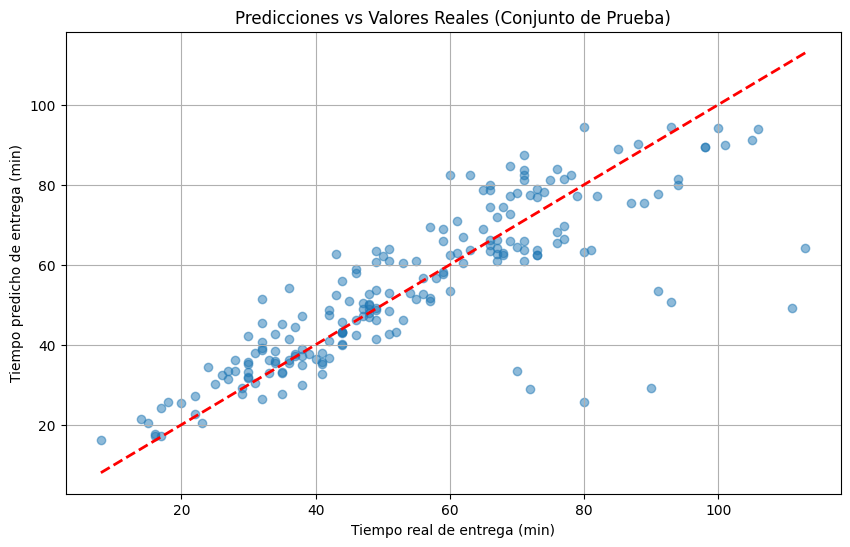

In [26]:
# Evaluar el mejor modelo en el conjunto de prueba
mejor_alpha = mejor_modelo['alpha']
mejor_max_iter = int(mejor_modelo['max_iter'])  # Convertir a entero
mejor_tol = mejor_modelo['tol']

# Entrenar el mejor modelo
mejor_modelo_final = Lasso(alpha=mejor_alpha, max_iter=mejor_max_iter, tol=mejor_tol, random_state=42)
mejor_modelo_final.fit(train_x, train_y)

# Predicciones en el conjunto de prueba
test_pred = mejor_modelo_final.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(test_y, test_pred)

print("\n--- Rendimiento Final en Test ---")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²: {test_r2:.4f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(test_y, test_pred, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
plt.xlabel('Tiempo real de entrega (min)')
plt.ylabel('Tiempo predicho de entrega (min)')
plt.title('Predicciones vs Valores Reales (Conjunto de Prueba)')
plt.grid(True)
plt.show()

In [ ]:
# Definir hiperparámetros para Decision Tree
tree_results = []
max_depth_values = [5, 10, 15]
min_samples_split_values = [5, 10, 20]
min_samples_leaf_values = [2, 4, 8]

# Convertir valores a enteros
max_depth_values = [int(x) for x in max_depth_values]
min_samples_split_values = [int(x) for x in min_samples_split_values]
min_samples_leaf_values = [int(x) for x in min_samples_leaf_values]

# Experimentación con diferentes hiperparámetros
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            # Crear y entrenar el modelo
            tree_model = DecisionTreeRegressor(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            tree_model.fit(train_x, train_y)
            
            # Predicciones
            train_pred = tree_model.predict(train_x)
            validation_pred = tree_model.predict(validation_x)
            
            # Calcular métricas
            train_mse = mean_squared_error(train_y, train_pred)
            val_mse = mean_squared_error(validation_y, validation_pred)
            train_rmse = np.sqrt(train_mse)
            val_rmse = np.sqrt(val_mse)
            train_r2 = r2_score(train_y, train_pred)
            val_r2 = r2_score(validation_y, validation_pred)
            
            # Guardar resultados
            tree_results.append({
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'Train_RMSE': train_rmse,
                'Val_RMSE': val_rmse,
                'Train_R2': train_r2,
                'Val_R2': val_r2
            })
            
            print(f"Completado: depth={max_depth}, split={min_samples_split}, leaf={min_samples_leaf}")

# Crear DataFrame con resultados y ordenar por RMSE de validación
tree_results_df = pd.DataFrame(tree_results)
tree_results_df_sorted = tree_results_df.sort_values('Val_RMSE')

# Mostrar los mejores 10 modelos
print("\nTop 10 mejores modelos de Decision Tree según RMSE en validación:")
display(tree_results_df_sorted.head(10))

# Obtener el mejor modelo
mejor_tree = tree_results_df_sorted.iloc[0]
print("\nMejor configuración encontrada para Decision Tree:")
for param, value in mejor_tree.items():
    print(f"{param}: {value}")

# Evaluar el mejor modelo en el conjunto de prueba
mejor_max_depth = int(mejor_tree['max_depth'])
mejor_min_samples_split = int(mejor_tree['min_samples_split'])
mejor_min_samples_leaf = int(mejor_tree['min_samples_leaf'])

# Entrenar el mejor modelo
mejor_tree_final = DecisionTreeRegressor(
    max_depth=mejor_max_depth,
    min_samples_split=mejor_min_samples_split,
    min_samples_leaf=mejor_min_samples_leaf,
    random_state=42
)
mejor_tree_final.fit(train_x, train_y)

# Predicciones en el conjunto de prueba
test_pred_tree = mejor_tree_final.predict(test_x)
test_mse_tree = mean_squared_error(test_y, test_pred_tree)
test_rmse_tree = np.sqrt(test_mse_tree)
test_r2_tree = r2_score(test_y, test_pred_tree)

print("\n--- Rendimiento Final de Decision Tree en Test ---")
print(f"MSE: {test_mse_tree:.4f}")
print(f"RMSE: {test_rmse_tree:.4f}")
print(f"R²: {test_r2_tree:.4f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(test_y, test_pred_tree, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
plt.xlabel('Tiempo real de entrega (min)')
plt.ylabel('Tiempo predicho de entrega (min)')
plt.title('Decision Tree: Predicciones vs Valores Reales (Test)')
plt.grid(True)
plt.show()

Completado: depth=5, split=5, leaf=2
Completado: depth=5, split=5, leaf=4
Completado: depth=5, split=5, leaf=8
Completado: depth=5, split=10, leaf=2
Completado: depth=5, split=10, leaf=4
Completado: depth=5, split=10, leaf=8
Completado: depth=5, split=20, leaf=2
Completado: depth=5, split=20, leaf=4
Completado: depth=5, split=20, leaf=8
Completado: depth=10, split=5, leaf=2
Completado: depth=10, split=5, leaf=4
Completado: depth=10, split=5, leaf=8
Completado: depth=10, split=10, leaf=2
Completado: depth=10, split=10, leaf=4
Completado: depth=10, split=10, leaf=8
Completado: depth=10, split=20, leaf=2
Completado: depth=10, split=20, leaf=4
Completado: depth=10, split=20, leaf=8
Completado: depth=15, split=5, leaf=2
Completado: depth=15, split=5, leaf=4
Completado: depth=15, split=5, leaf=8
Completado: depth=15, split=10, leaf=2
Completado: depth=15, split=10, leaf=4
Completado: depth=15, split=10, leaf=8
Completado: depth=15, split=20, leaf=2
Completado: depth=15, split=20, leaf=4
Comp

,max_depth,min_samples_split,min_samples_leaf,Train_RMSE,Val_RMSE,Train_R2,Val_R2
2,5,5,8,10.761774,11.678582,0.768158,0.700169
5,5,10,8,10.761774,11.678582,0.768158,0.700169
7,5,20,4,10.840358,11.680355,0.764760,0.700078
8,5,20,8,10.840358,11.680355,0.764760,0.700078
11,10,5,8,9.756874,11.720187,0.809434,0.698029
14,10,10,8,9.756874,11.720187,0.809434,0.698029
20,15,5,8,9.756874,11.720187,0.809434,0.698029
23,15,10,8,9.756874,11.720187,0.809434,0.698029
1,5,5,4,10.626832,11.746210,0.773936,0.696687
4,5,10,4,10.666230,11.768599,0.772257,0.695529



Mejor configuración encontrada para Decision Tree:
max_depth: 5.0
min_samples_split: 5.0
min_samples_leaf: 8.0
Train_RMSE: 10.761773832318806
Val_RMSE: 11.678581854175004
Train_R2: 0.768158301496475
Val_R2: 0.7001692855011531


InvalidParameterError: The 'max_depth' parameter of DecisionTreeRegressor must be an int in the range [1, inf) or None. Got np.float64(5.0) instead.

In [ ]:
# Definir hiperparámetros para K-means
kmeans_results = []
n_clusters_values = [2, 3, 4]
init_values = ['k-means++', 'random']
max_iter_values_kmeans = [100, 200, 300]

# Experimentación con diferentes hiperparámetros
for n_clusters in n_clusters_values:
    for init in init_values:
        for max_iter in max_iter_values_kmeans:
            # Crear y entrenar el modelo
            kmeans = KMeans(
                n_clusters=n_clusters,
                init=init,
                max_iter=max_iter,
                random_state=42
            )
            kmeans.fit(train_x)
            
            # Calcular el Silhouette Score
            silhouette_avg = silhouette_score(train_x, kmeans.labels_)
            
            # Guardar resultados
            kmeans_results.append({
                'n_clusters': n_clusters,
                'init': init,
                'max_iter': max_iter,
                'silhouette_score': silhouette_avg
            })
            
            print(f"Completado: clusters={n_clusters}, init={init}, max_iter={max_iter}")

# Crear DataFrame con resultados y ordenar por Silhouette Score
kmeans_results_df = pd.DataFrame(kmeans_results)
kmeans_results_df_sorted = kmeans_results_df.sort_values('silhouette_score', ascending=False)

# Mostrar los mejores resultados
print("\nResultados de K-means ordenados por Silhouette Score:")
display(kmeans_results_df_sorted)

# Obtener la mejor configuración
mejor_kmeans = kmeans_results_df_sorted.iloc[0]
print("\nMejor configuración encontrada para K-means:")
for param, value in mejor_kmeans.items():
    print(f"{param}: {value}")

# Entrenar el mejor modelo
mejor_kmeans_final = KMeans(
    n_clusters=int(mejor_kmeans['n_clusters']),
    init=mejor_kmeans['init'],
    max_iter=int(mejor_kmeans['max_iter']),
    random_state=42
)
mejor_kmeans_final.fit(train_x)

# Visualizar los clusters (usando las dos primeras características)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_x[:, 0], train_x[:, 1], 
                     c=mejor_kmeans_final.labels_, 
                     cmap='viridis')
plt.scatter(mejor_kmeans_final.cluster_centers_[:, 0], 
           mejor_kmeans_final.cluster_centers_[:, 1], 
           marker='x', s=200, linewidths=3, color='r', 
           label='Centroids')
plt.title(f'K-means Clustering (k={mejor_kmeans["n_clusters"]})')
plt.colorbar(scatter)
plt.legend()
plt.grid(True)
plt.show()

# K-means Clustering

### Métrica de evaluación:
Silhouette Score: Mide qué tan similar es un objeto a su propio cluster comparado con otros clusters
- Valores cercanos a 1 indican buena separación
- Valores cercanos a 0 indican clusters solapados
- Valores negativos indican mala asignación

### Hiperparámetros:
- n_clusters: Número de grupos [2, 3, 4]
- init: Método de inicialización ['k-means++', 'random']
- max_iter: Máximo de iteraciones [100, 200, 300]

# Decision Tree Regressor

### Error a medir:
- RMSE (Root Mean Square Error): Utilizado por ser interpretable en las mismas unidades que la variable objetivo (minutos)
- R²: Para medir la proporción de varianza explicada por el modelo

### Hiperparámetros:
- max_depth: Profundidad máxima del árbol [5, 10, 15]
- min_samples_split: Mínimo de muestras para dividir [5, 10, 20]
- min_samples_leaf: Mínimo de muestras en hoja [2, 4, 8]